# Computer Book A, Activity 15

Use `pandas` to calculate and display numerical summaries of some data.

- Sample mean
- Sample median
- Sample quartiles
- Sample IQR
- Sample standard deviation

This differs to Computer Activity 14 because we need to subcategorise the data.

## Package import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

## Data import

In [2]:
# import the data
df = pd.read_csv("../data/response-inhibition.csv")

# preview the DataFrame
df.head()

,ID,Group,Gender,Weight change
0,1,1,1,-0.6
1,2,1,1,1.0
2,3,1,1,0.2
3,4,0,1,0.8
4,5,1,1,-1.9


## Data wrangling

In [3]:
# check dtypes
df.dtypes

ID                 int64
Group              int64
Gender             int64
Weight change    float64
dtype: object

In [4]:
# Recast Group -> cat
df = df.astype({'Group': 'category'})

In [5]:
# recode Groups to Treatment, Control
df['Group'].replace({0: 'Control', 1: 'Treatment'}, inplace=True)

df.head()

,ID,Group,Gender,Weight change
0,1,Treatment,1,-0.6
1,2,Treatment,1,1.0
2,3,Treatment,1,0.2
3,4,Control,1,0.8
4,5,Treatment,1,-1.9


Data is merged. Use groupby() to stratify the data

In [6]:
# Select Groups, Weight Change, and then Groupby
df_grouped = df[['Group', 'Weight change']].groupby("Group")

## Summary table

In [7]:
df_grouped.describe()

Weight change                                             
                  count      mean      std  min  25%   50%  75%  max
Group                                                               
Control            41.0  0.170732  1.20130 -3.2 -0.7  0.10  1.0  2.7
Treatment          40.0 -0.670000  1.70823 -7.0 -1.5 -0.55  0.2  3.6

## Individual summary measures

In [8]:
# sample mean
df_grouped.mean()

,Weight change
Group,
Control,0.170732
Treatment,-0.670000


In [9]:
# sample median
df_grouped.median()

,Weight change
Group,
Control,0.10
Treatment,-0.55


In [10]:
# lower sample quartile
df_grouped.quantile(0.25)

,Weight change
Group,
Control,-0.7
Treatment,-1.5


In [11]:
# upper sample quartile
df_grouped.quantile(0.75)

,Weight change
Group,
Control,1.0
Treatment,0.2


In [12]:
# Sample iqr
df_grouped.quantile(0.75) - df_grouped.quantile(0.25)

,Weight change
Group,
Control,1.7
Treatment,1.7


In [13]:
# sample standard deviation
df_grouped.std()

,Weight change
Group,
Control,1.20130
Treatment,1.70823


## Plot a comparative boxplot of the data

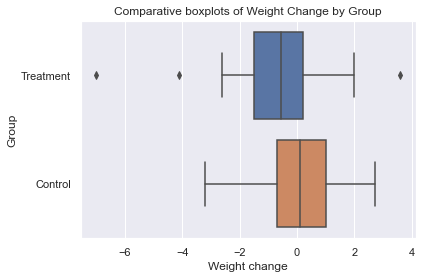

In [16]:
f, ax = plt.subplots()

sns.boxplot(data=df,
            x="Weight change",
            y="Group")

ax.set(title="Comparative boxplots of Weight Change by Group")

plt.show()